In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.interpolate
import re
import pandas as pd

In [17]:
ext_type = 'cs'
nsamp = 5
newsavename = "*"

if newsavename == None:
    EOSdir_name = ext_type+str(nsamp)+'EOS'
    MRLdir_name = ext_type+str(nsamp)+'MRL'
    
else:
    EOSdir_name = ext_type+str(nsamp)+'EOS'+newsavename
    MRLdir_name = ext_type+str(nsamp)+'MRL'+newsavename

datapath = os.getcwd() + "/data/"

numlist = []
num_eos, num_mrl = 0, 0
for file in os.listdir(datapath+EOSdir_name):
        if '.dat' in file:
            numlist.append(int(file[:-4]))
            num_eos += 1
            
for file in os.listdir(datapath+MRLdir_name):
        if '.dat' in file:
            numlist.append(int(file[:-4]))
            num_mrl += 1


In [18]:
print(num_eos)

957


In [6]:
maximum_mass = np.zeros(num_eos)
mass_max = np.zeros(num_eos)

In [7]:
for i in range(num_eos):
    file = datapath+MRLdir_name+'/'+str(i)+'.dat'
    MRL = np.loadtxt(file)
    Mass = MRL[:,0]
    Radius = MRL[:,1]
    
    maximum_mass[i] = np.max(Mass)
    mass_max[i] = Mass[-1]

OSError: /Users/brendanking/Documents/LANL_project/data/cs5MRL*/191.dat not found.

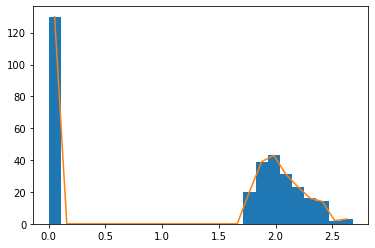

In [8]:
n,x,_ = plt.hist(maximum_mass, bins=25)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges


ValueError: x and y must have same first dimension, but have shapes (250,) and (191,)

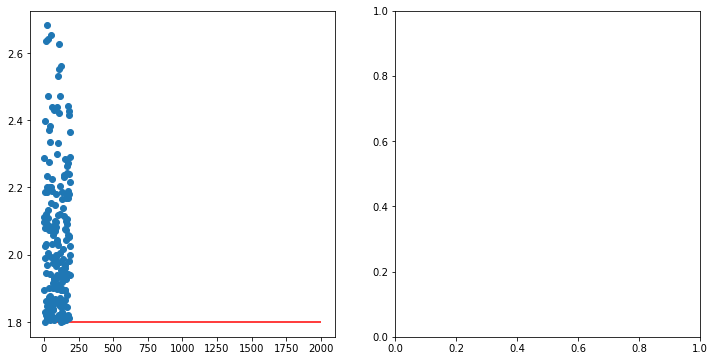

In [19]:
# plt.plot(np.arange(1000,number_eos-980,step=1), maximum_mass[1000:number_eos-980], 'o' )
fig, ax = plt.subplots(1,2, figsize=(12,6))
min_n = 0
max_n = 250

ax[0].plot(np.arange(0,num_eos,step=1), maximum_mass, 'o' )
ax[0].hlines(1.8, xmin=0, xmax=2000, color='r')

ax[1].plot(np.arange(min_n,max_n,step=1), maximum_mass[min_n:max_n], 'o' )
ax[1].plot(np.arange(min_n,max_n,step=1), mass_max[min_n:max_n], 'o' )
ax[1].hlines(1.8, xmin=min_n, xmax=max_n, color='r')

In [9]:
def plotMRL(ext_type, nsamp, index, newsavename=None):
    if newsavename == None:
        EOSdir_name = ext_type+str(nsamp)+'EOS'
        MRLdir_name = ext_type+str(nsamp)+'MRL'
    
    else:
        EOSdir_name = ext_type+str(nsamp)+'EOS'+newsavename
        MRLdir_name = ext_type+str(nsamp)+'MRL'+newsavename

    datapath = os.getcwd() + "/data/"
    
    MRL = np.loadtxt(datapath+MRLdir_name+'/'+str(index)+'.dat')
    Mass = MRL[:,0]
    Radius = MRL[:,1]
    Lambda = MRL[:,2]
    
    EOS = np.loadtxt(datapath+EOSdir_name+'/'+str(i)+'.dat')
    p = EOS[:,1]
    e = EOS[:,2]
    
#     print(np.mean(Mass), np.max(Mass))
    
    fig, ax = plt.subplots(1,2, figsize=(16,8))
    
    ax[0].plot(Radius, Mass, 'o', label=str(index))
    ax[0].set_xlabel('Radius (km)')
    ax[0].set_ylabel('Mass (Mo)')
    

    ax[1].plot(e, p, label=str(index), ls='-')
    ax[1].set_ylabel('Pressure (MeV/fm3)')
    ax[1].set_xlabel('Energy Density (MeV/fm3)')
    
    return MRL

def plotmanyMRL(ext_type, nsamp, index_list, newsavename=None, color='g', linestyle='-', alpha=0.75, legend=False):
    if newsavename == None:
        EOSdir_name = ext_type+str(nsamp)+'EOS'
        MRLdir_name = ext_type+str(nsamp)+'MRL'
    
    else:
        EOSdir_name = ext_type+str(nsamp)+'EOS'+newsavename
        MRLdir_name = ext_type+str(nsamp)+'MRL'+newsavename
    
    datapath = os.getcwd() + "/data/"  
    
    fig, ax = plt.subplots(1,2, figsize=(16,8))
    
    for i in index_list:
        MRL = np.loadtxt(datapath+MRLdir_name+'/'+str(i)+'.dat');
        Mass = MRL[:,0]
        Radius = MRL[:,1]
        Lambda = MRL[:,2]
        
        EOS = np.loadtxt(datapath+EOSdir_name+'/'+str(i)+'.dat')
        p = EOS[:,1]
        e = EOS[:,2]

        ax[0].plot(Radius, Mass, label=str(i), color=color, ls=linestyle)
        ax[0].set_xlabel('Radius (km)')
        ax[0].set_ylabel('Mass (Mo)') 
        if legend==True:
            ax[0].legend()

        ax[1].plot(e, p, label=str(i), color=color, ls=linestyle)
        ax[1].set_ylabel('Pressure (MeV/fm3)')
#         ax[1].set_ylim(0,750)
        ax[1].set_xlabel('Energy Density (MeV/fm3)')
#         ax[1].set_xlim(200,1000)
        if legend==True:
            ax[1].legend()
    
    if newsavename=='_n0':
        cs_eq1EOS = np.loadtxt(datapath+"cs_eq1EOS_n0")
        ax[1].plot(cs_eq1EOS[:,2], cs_eq1EOS[:,1], label='cs=1', color='black')

        cs_eq1MRL = np.loadtxt(datapath+"cs_eq1MRL_n0")
        ax[0].plot(cs_eq1MRL[:,1], cs_eq1MRL[:,0], label='cs=1', color='black')
        
    else:
        cs_eq1EOS = np.loadtxt(datapath+"cs_eq1EOS")
        ax[1].plot(cs_eq1EOS[:,2], cs_eq1EOS[:,1], label='cs=1', color='black')

        cs_eq1MRL = np.loadtxt(datapath+"cs_eq1MRL")
        ax[0].plot(cs_eq1MRL[:,1], cs_eq1MRL[:,0], label='cs=1', color='black')

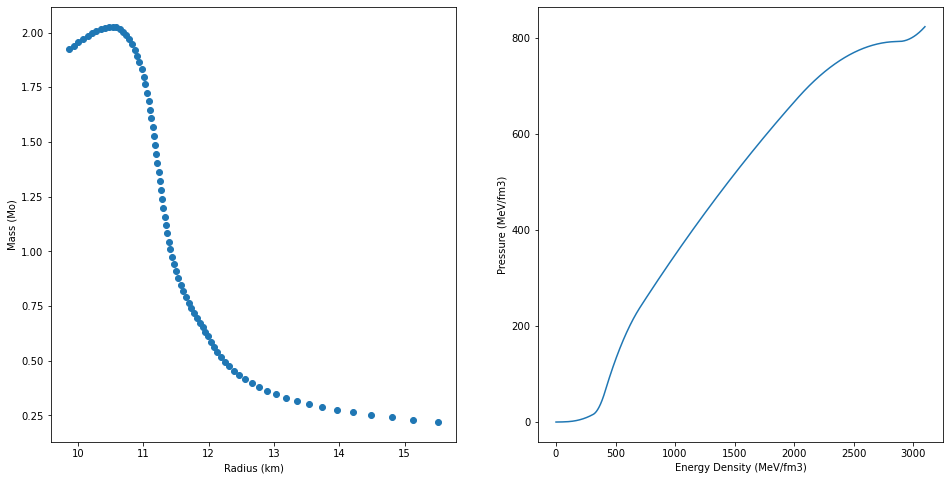

In [22]:
MRL = plotMRL('cs', 5, 239)

OSError: /Users/brendanking/Documents/LANL_project/data/cs5MRL*/1463.dat not found.

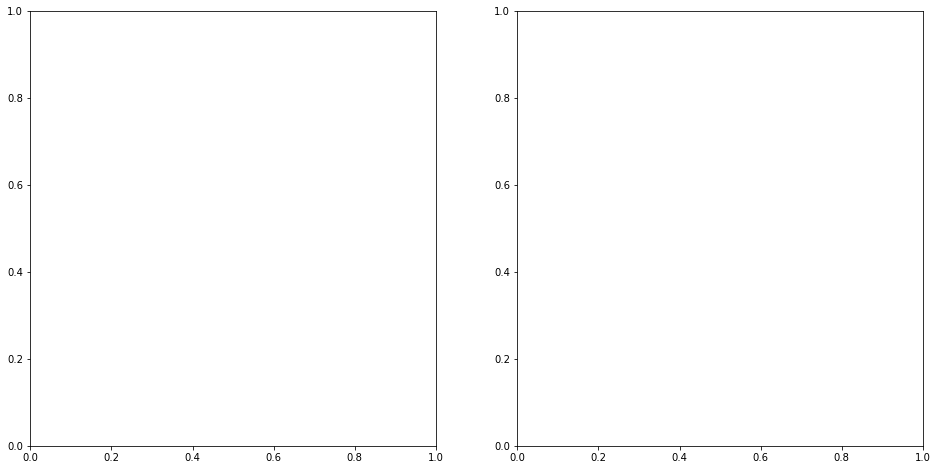

In [11]:
import random
population_1 = range(1,2000)
n_index = 200
index_list_1 = random.sample(population_1,n_index)
plotmanyMRL('cs',5,index_list_1, newsavename='*', legend=False)

# pop_2 = range(1000,1500)
# index_list_2 = random.sample(pop_2,n_index)
# plotmanyMRL('p',3, index_list_2)

In [141]:
def EOS_cs_stats(ext_type, nsamp, which_cs, index_list, newsavename=None, plot=True):
    if newsavename == None:
        EOSdir_name = ext_type+str(nsamp)+'EOS'
    else:
        EOSdir_name = ext_type+str(nsamp)+'EOS'+newsavename
    
    datapath = os.getcwd() + "/data/" 

    if which_cs > nsamp:
        print("variable which_n must be leq nsamp")
    elif which_cs == 1:
        pattern = "cs\s*=\[(\d+\.\d+).*\]"
    elif which_cs == 2:
        pattern = "cs\s*=\s*\[\d+\.\d+\s+(\d+\.\d+).*\]"
    elif which_cs == 3:
        pattern = "cs\s*=\s*\[\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+).*\]"
    elif which_cs == 4:
        pattern = "cs\s*=\s*\[\d+\.\d+\s+\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+).*\]"
    elif which_cs == 5:
        pattern = "cs\s*=\s*\[\d+\.\d+\s+\d+\.\d+\s+\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+).*\]"
    else:
        print("something went wrong")
    
    p = re.compile(pattern)
    
    cs_2 = np.zeros(len(index_list))
    j = 0
    for i in index_list:
        EOS = np.loadtxt(datapath+EOSdir_name+'/'+str(i)+'.dat')
        with open(datapath+EOSdir_name+'/'+str(i)+'.dat', 'r') as f:
            header = f.readline()

        if type(p.search(header)) != type(None):       
            cs_2[j] = float(p.search(header).group(1))

        j+=1
    
    if plot==True:        
        plt.hist(cs_2,bins=25)
        plt.xlabel("Speed of Sound (c_s/c)")
    
    return cs_2

def EOS_ns_stats(ext_type, nsamp, which_ns, index_list, newsavename=None, plot=True):
    if newsavename == None:
        EOSdir_name = ext_type+str(nsamp)+'EOS'
    else:
        EOSdir_name = ext_type+str(nsamp)+'EOS'+newsavename
    datapath = os.getcwd() + "/data/" 
    
    if which_n > nsamp:
        print("variable which_n must be leq nsamp")
    elif which_n == 1:
        pattern = "ns\s*=\[(\d+\.\d+).*\]"
    elif which_n == 2:
        pattern = "ns\s*=\s*\[\d+\.\d+\s+(\d+\.\d+).*\]"
    elif which_n == 3:
        pattern = "ns\s*=\s*\[\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+).*\]"
    elif which_n == 4:
        pattern = "ns\s*=\s*\[\d+\.\d+\s+\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+).*\]"
    elif which_n == 5:
        pattern = "ns\s*=\s*\[\d+\.\d+\s+\d+\.\d+\s+\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+).*\]"
    else:
        print("something went wrong")
        
    
    p = re.compile(pattern)
    
    ns = np.zeros(len(index_list))
    j = 0
    for i in index_list:
        EOS = np.loadtxt(datapath+EOSdir_name+'/'+str(i)+'.dat')
        with open(datapath+EOSdir_name+'/'+str(i)+'.dat', 'r') as f:
            header = f.readline()
        if type(p.search(header)) != type(None):    
            ns[j] = float(p.search(header).group(1))
        j+=1
    
    if plot==True:
        plt.hist(ns,bins=25)
        plt.xlabel("Density")
    
    return ns

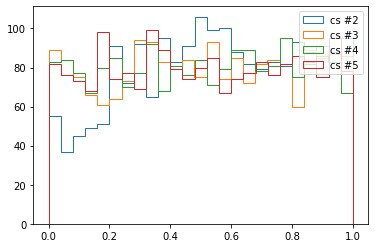

In [139]:
nsamp = 5
index_list = range(0,num_eos-1)

for i in range(nsamp-1):
    cs_stats = EOS_cs_stats("lin", nsamp, i+2, index_list, newsavename='_n0_fixed', plot=False)
    plt.hist(cs_stats, bins=25, histtype='step', label='cs #'+str(i+2))
    
plt.legend()

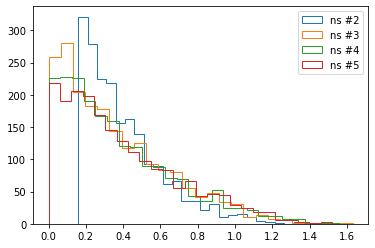

In [144]:
nsamp = 5
index_list = range(0,num_eos-1)

for i in range(nsamp-1):
    ns_stats = EOS_ns_stats("cs", nsamp, i+2, index_list, newsavename='_n0', plot=False)
#     plt.hist(ns_stats, bins=25, histtype='step', label='ns #'+str(i+2))
    
    # initialize previous stats array
    if i==0:
        past_ns = np.zeros(ns_stats.shape)
    
    # calc difference
    dif_ns = ns_stats - past_ns
    # put new old values into array
    past_ns = ns_stats
    
    plt.hist(dif_ns, bins=25, histtype='step', label='ns #'+str(i+2))
    
plt.legend()

In [13]:
diffMRL = np.ediff1d(MRL[:,0])
drop_in_m = np.argmax(diffMRL < 0) # index of first drop in mass
above_m = np.argmax(MRL[:,0]>MRL[drop_in_m,0])
above_m

1

Text(0.5, 0, 'Mass (Mo)')

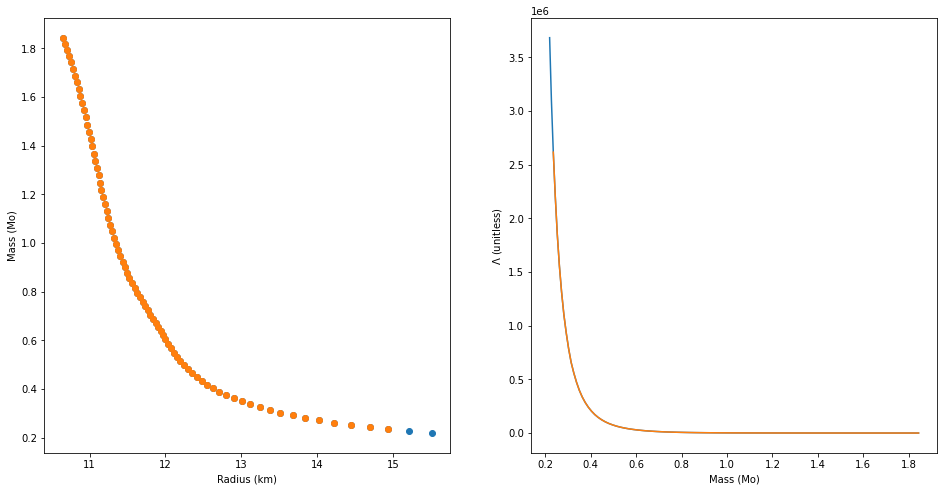

In [14]:
Mass = MRL[:,0]
Radius = MRL[:,1]
Lambda = MRL[:,2]

keep = np.zeros(MRL[:,0].shape[0], dtype=bool)
for i in range(MRL[:,0].shape[0]):
    keep[i] = i < drop_in_m or i > above_m
    
Mass_keep = MRL[keep,0]
Radius_keep = MRL[keep,1]
Lambda_keep = MRL[keep,2]

fig, ax = plt.subplots(1,2, figsize=(16,8))
    
ax[0].plot(Radius, Mass, 'o')
ax[0].plot(Radius_keep, Mass_keep, 'o')
ax[0].set_xlabel('Radius (km)')
ax[0].set_ylabel('Mass (Mo)')

ax[1].plot(Mass, Lambda)
ax[1].plot(Mass_keep, Lambda_keep)
ax[1].set_ylabel('$\Lambda$ (unitless)')
ax[1].set_xlabel('Mass (Mo)')

In [34]:
def plotEOS(ext_type, nsamp, index):
    EOSdir_name = ext_type+str(nsamp)+'EOS'
    datapath = os.getcwd() + "/data/"
    
    EOS = np.loadtxt(datapath+EOSdir_name+'/'+str(index)+'.dat')
    n = EOS[:,0]
    p = EOS[:,1]
    e = EOS[:,2]
    
    with open(datapath+EOSdir_name + '/' + str(index)+'.dat', 'r') as f:
        header = f.readline()
    print(header)
    
    cs2 = np.zeros(p.shape[0]-1)
    
    for j in range(p.shape[0]-1):
        cs2[j] = (p[j+1]-p[j])/(e[j+1]-e[j])
    
    fig, ax = plt.subplots(1,2, figsize=(16,8))
    
    ax[0].plot(e, p, '-', label=str(index))
    ax[0].set_xlabel('Energy Density (MeV/fm$^3$)')
    ax[0].set_ylabel('Pressure (MeV/fm$^3$)')
    
    cs_eq1EOS = np.loadtxt(datapath+"cs_eq1EOS")
    ax[0].plot(cs_eq1_EOS[:,2], cs_eq1_EOS[:,1], color='black', label="cs=1")
    
    cs_eq1 = np.zeros(cs_eq1_EOS.shape[0]-1)
    for j in range(cs_eq1_EOS.shape[0]-1):
        cs_eq1[j] = (cs_eq1_EOS[j+1,1]-cs_eq1_EOS[j,1])/(cs_eq1_EOS[j+1,2]-cs_eq1_EOS[j,2])
    
    ax[1].plot(e[:p.shape[0]-1], cs2, label=str(index))
    ax[1].plot(cs_eq1_EOS[:cs_eq1_EOS.shape[0]-1,2], cs_eq1, label="cs=1")
    ax[1].hlines(1, xmin=e[0], xmax=e[-2], color='r')
    ax[1].set_ylabel('Speed of Sound')
    ax[1].set_xlabel('Energy Density (MeV/fm$^3$)')
    
# def plot_fixedEOS(ext_type, nsamp, index):
#     EOSdir_name = ext_type+str(nsamp)+'fixedEOS'
#     datapath = os.getcwd() + "/data/"
    
#     EOS = np.loadtxt(datapath+EOSdir_name+'/'+str(index)+'.dat')
#     n = EOS[:,0]
#     p = EOS[:,1]
#     e = EOS[:,2]
    
#     with open(datapath+EOSdir_name + '/' + str(index)+'.dat', 'r') as f:
#         header = f.readline()
#     print(header)

#     cs2 = np.zeros(p.shape[0]-1)
    
#     for j in range(p.shape[0]-1):
#         cs2[j] = (p[j+1]-p[j])/(e[j+1]-e[j])
    
#     fig, ax = plt.subplots(1,2, figsize=(16,8))
    
#     ax[0].plot(e, p, 'o', label="fixed"+str(index))
#     ax[0].set_xlabel('Energy Density (MeV/fm$^3$)')
#     ax[0].set_ylabel('Pressure (MeV/fm$^3$)')
    
#     ax[1].plot(e[:p.shape[0]-1], cs2, label="fixed"+str(index))
#     ax[1].hlines(1, xmin=e[0], xmax=e[-2], color='r')
#     ax[1].set_ylabel('Speed of Sound')
#     ax[1].set_xlabel('Energy Density (MeV/fm$^3$)')

In [16]:
print(MRL[72:87,1])

[10.83253665 10.80750278 10.78159937 10.75618093 10.72885604 10.70122867
 10.67244538 10.64448016]


# ns =[0.32       0.62700283 0.73499706 1.75091512 1.89504721 1.92      ] cs =[0.36540786 0.87223814 0.21078694 0.76975235 0.76414514 0.47807688]



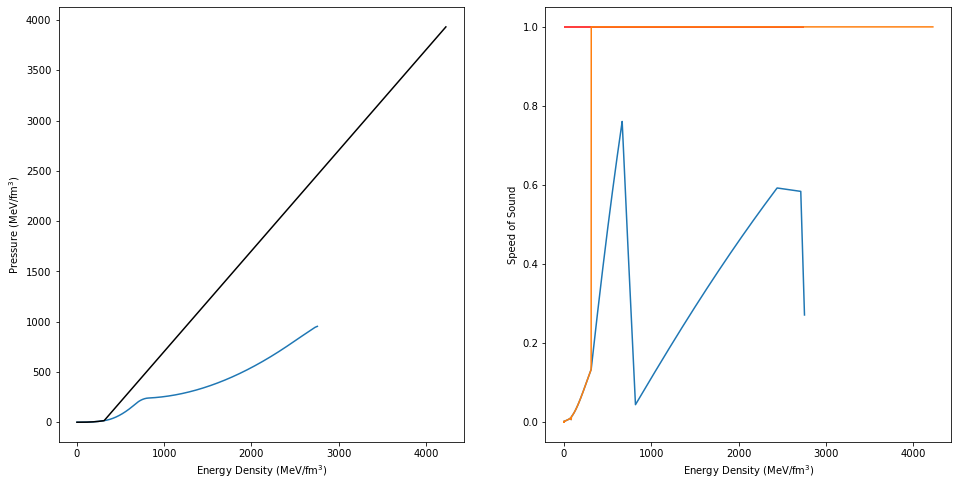

In [38]:
index = 4001
plotEOS('cs', 5, index)

In [70]:
def get_r1p4(MRL_table):
    max_index = np.argmax(MRL_table[:,0])
    clipped_MRL = MRL_table[:max_index-1,:]
        
    diffMRL = np.ediff1d(clipped_MRL[:,0])
    drop_in_m = np.argmax(diffMRL < 0) # index of first drop in mass
    above_m = np.argmax(clipped_MRL[:,0]>clipped_MRL[drop_in_m,0])
    
    keep = np.zeros(clipped_MRL[:,0].shape[0], dtype=bool)
    for i in range(clipped_MRL[:,0].shape[0]):
        keep[i] = i < drop_in_m or i > above_m
        
    fixed_MRL = clipped_MRL[keep,:]
    r_func = scipy.interpolate.CubicSpline(fixed_MRL[:,0], fixed_MRL[:,1])
    r1p4 = r_func(1.4)
    
    return r1p4

In [73]:
skip = 0
r1p4 = np.zeros(num_eos-skip)

for i in range(num_eos-skip):
    file = datapath+MRLdir_name+'/'+str(i+skip)+'.dat'
    MRL = np.loadtxt(file)

    r1p4[i] = get_r1p4(MRL)

723


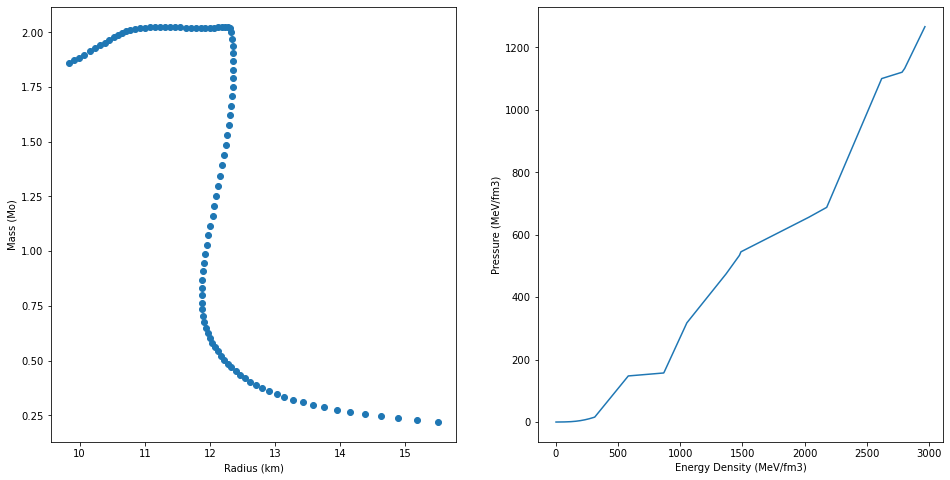

In [72]:
print(i)
MRL = plotMRL('lin', 15, newsavename=None, index=i)

In [82]:
def filter_MRL(MRL_table, m_ub=5, r_lb=7):
    raw_mass = MRL_table[:,0]
    raw_radius = MRL_table[:,1]
    raw_Lambda = MRL_table[:,2]
    # create boolean arrays to test if points are good
    m2big = raw_mass < m_ub
    r2small = raw_radius > r_lb
    # the bool array of points we will keep
    keep = np.logical_and(m2big, r2small)
    # define new arrays we will keep, this filters out erronious points in array
    radius = raw_radius[keep]
    mass = raw_mass[keep]
    Lambda = raw_Lambda[keep]
    
    leng = len(radius) # get number of physical points
    MRL = np.zeros((leng, 3)) # initialize MRL table
    MRL[:,0], MRL[:,1], MRL[:,2] = mass, radius, Lambda # put into table
    
    return MRL

def exclude_by_mass(MRL, maxm_lb=1.8, maxm_ub=4.1):
    maxm = np.max(MRL[:,0])
    if maxm < maxm_ub and maxm > maxm_lb:
        MRL_passes = True
    else:
        MRL_passes = False
    return MRL_passes

In [134]:
import EOS_extension
import TOVsolver

datapath = os.getcwd() + "/data/"
EOSdir_name = 'lin5EOS_n0_fixed/'
MRLdir_name = "lin5MRL_n0_fixed/"

EOS_og = pd.read_table('data/EOSCEFTVE1.dat', header=None).to_numpy()
keep = EOS_og[:,0] < 0.1601
EOS_start = EOS_og[keep,:]

EOS, ns, cs = EOS_extension.extend(EOS_start, nsamp=5, ext_type='lin')
param_string = "ns =" + str(ns) + ' cs =' + str(cs)

MRL_table = TOVsolver.solve(EOS, size=100) #solve tov
# filter out erronious points
MRL = filter_MRL(MRL_table)
#check if maximum mass is realistic
MRL_inrange = exclude_by_mass(MRL)

if MRL_inrange == True:
    
    EOSname = datapath + EOSdir_name + str(i) + '.dat' # make names for file
    MRLname = datapath + MRLdir_name + str(i) + '.dat'
    np.savetxt(EOSname, EOS, header=param_string) # save files
    np.savetxt(MRLname, MRL)
    